In [3]:
import cv2
import numpy as np
from keras.models import load_model

SIZE_FACE = 48
CASC_PATH = './data/haarcascade_frontalface_default.xml'
EMOTIONS = ['angry', 'disgusted', 'fearful', 'happy', 'sad', 'surprised', 'neutral']
font = cv2.FONT_HERSHEY_SIMPLEX


In [8]:
model = load_model('./data/keras_model_v1_64_95.h5')
# model = load_model('./data/keras_model.h5')

faceCascade = cv2.CascadeClassifier(CASC_PATH)

video_capture = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=8,
        minSize=(35, 35),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # resize and normalize for prediction using our CNN
    gray_face = cv2.resize(gray[y:(y+h), x:(x+w)], (SIZE_FACE, SIZE_FACE), interpolation = cv2.INTER_CUBIC) / 255.
    gray_face = gray_face.reshape([-1, SIZE_FACE, SIZE_FACE, 1])
    
    prediction = model.predict(gray_face)
    
    index=np.argmax(prediction)
    emotion_str = 'emotion: ' + EMOTIONS[index]
    probability_str = 'probability: ' + str(prediction[0][index])
    
    # draw text emotion
    cv2.putText(frame,emotion_str,(x, y-10), font, 0.5,(255,255,255),1,cv2.LINE_AA)
    cv2.putText(frame,probability_str,(x, y-30), font, 0.5,(255,255,255),1,cv2.LINE_AA)
    
    # Display the resulting frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

In [40]:
# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

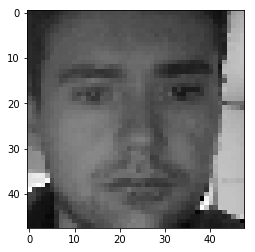

In [25]:
from matplotlib import pyplot as plt

plt.cla()   # Clear axis
plt.clf()   # Clear figure
plt.close() # Close a figure window

plt.imshow(gray_face, cmap = 'gray')
plt.show()